<a href="https://colab.research.google.com/github/pascal-bergeron/ai4forgood2016/blob/main/FeatureBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cp 'drive/My Drive/Projects/AIForGood2020/' . -r

In [ ]:
cd AIForGood2020/

/content/AIForGood2020


In [ ]:
# !unrar e -p*hack20 211GrandMontreal_DataPack.rar

# Agencies Taxonomomies

In [28]:
org = pd.read_excel('organisation.xlsx')

In [29]:
org.set_index('ResourceAgencyNum', inplace=True)

In [30]:
org.tail()

,PublicName,LegalStatus,AlternateName,TaxonomyLevelName,ParentAgency,ParentAgencyNum,LastVerifiedOn,LanguageOfRecord,Custom_Statut temporaire Covid-19,Custom_Acronym,Municipalité_Code,PhysicalAddress1,PhysicalAddressIsPrivate,PhysicalStateProvince,PhysicalPostalCode,Latitude,Longitude,Coverage,TaxonomyCodes
ResourceAgencyNum,,,,,,,,,,,,,,,,,,,
30790854,BIBLIOTHÈQUE PUBLIQUE DE DOLLARD-DES-ORMEAUX,organisme municipal,NaN,Program,DOLLARD-DES-ORMEAUX - VILLE,18760983,2020-06-04,fr,Ouvert,NaN,66142.0,"12001, boulevard De Salaberry",No,QC,H9B 2A7,45.48414,-73.80695,QC - Montréal County - Dollard-Des Ormeaux;,TJ-4400; TJ-1800.6650; TJ-4500.2900; TJ-4500.1...
51229060,BIBLIOTHÈQUE MUNICIPALE DE NAPIERVILLE,organisme municipal,NaN,Program,NAPIERVILLE - MUNICIPALITÉ,19499426,2020-06-05,fr,Ouvert,NaN,68030.0,"290, rue Saint-Alexandre",No,QC,J0J 1L0,45.18862,-73.40354,QC - Montérégie County - Saint-Cyprien-de-Napi...,TJ-4400; TJ-1800.6650; TJ-4500.1500-800; TJ-45...
49492168,BIBLIOTHÈQUE MUNICIPALE DE SAINT-JACQUES-LE-MI...,organisme municipal,NaN,Program,SAINT-JACQUES-LE-MINEUR - MUNICIPALITÉ,19533005,2019-08-21,fr,Ouvert,NaN,68040.0,"89, rue Principale",No,QC,J0J 1Z0,45.27682,-73.41787,QC - Montérégie County - Saint-Jacques-le-Mineur;,TJ-4400; TJ-1800.6650
18766848,"BOISBRIAND - LOISIRS, CULTURE ET BIBLIOTHÈQUE",organisme municipal,NaN,Program,BOISBRIAND - VILLE,18762253,2020-06-08,fr,Ouvert,NaN,73005.0,"940, boulevard de la Grande Allée, rez-de-chau...",No,QC,J7G 2J7,45.61253,-73.83842,QC - Laurentides County - Boisbriand;,TD-0300.1200 * PL-7000.4360
42388216,REBOND (LE),organisme parapublic,NaN,Program,OFFICE MUNICIPAL D'HABITATION DE MONTRÉAL - SI...,18760248,2019-08-14,fr,Ouvert,NaN,NaN,NaN,Yes,QC,NaN,NaN,NaN,QC - Montréal County - Ahuntsic-Cartierville; ...,PS-9800.9800; TJ-1800.3300-600.10 * YB-9500.0500


In [31]:
def get_level_2_taxonomy_code_list(ser: pd.Series) -> pd.Series:
  first_split = ser.str.split("; ")
  return first_split.apply(lambda x : np.nan if isinstance(x, float) and np.isnan(x) else [y[:7] for y in x] )

In [32]:
org['L2_tax_codes'] = get_level_2_taxonomy_code_list(org['TaxonomyCodes'])

In [33]:
org['L2_tax_codes'].head()

ResourceAgencyNum
34515394                                   [TD-6500, TD-1600]
18764735    [TC-5500, YH-6000, ND-3500, HH-0500, HH-0500, ...
18762709                                   [TN-4600, FT-4800]
18765353    [BM-8500, BD-1800, TI-1800, TI-1800, TI-1800, ...
54247598    [TD-1600, PS-8000, RP-1400, PH-0320, RP-1400, ...
Name: L2_tax_codes, dtype: object

# Calls

In [34]:
calls = pd.read_excel('calls_consolid.xlsx')

In [35]:
calls.set_index('CallReportNum', inplace=True)

In [36]:
calls.head()

,CallDateAndTimeStart,StateProvince,Heure,Code postal court,Municipalité_Code,Âge,Catégorie d'âge,Genre,Langue,Mode De Communication,Municipalité_Nom,Région Administrative,Région administrative_Code,Territoire_division,Territoire_code,MRC,MRCEN,Superficie,Population,Statut,Territoire CMM,Territoire CMM_val,Centraide Grand Montréal,Territoire 211 Grand Montréal
CallReportNum,,,,,,,,,,,,,,,,,,,,,,,,
51805319,2018-04-01,QC,10,NaN,999001.0,NaN,NaN,Femme,Français,Appels,Inconnu-Laval,Laval,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laval,Oui,Laval,Oui
51805954,2018-04-01,QC,11,H1T,66213.0,35.0,30-39 ans,Homme,Français,Appels,Rosemont—La Petite-Patrie,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui
51806285,2018-04-01,QC,12,NaN,66023.0,NaN,NaN,Homme,Français,Appels,Montréal,Montréal,6.0,Montréal,66.0,Montréal,Montréal,430.6,1777058.0,ville,Montréal,Oui,Montréal,Oui
51806377,2018-04-01,QC,12,H1J,66201.0,40.0,40-49 ans,Homme,Français,Appels,Anjou,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui
51806428,2018-04-01,QC,12,H2K,66217.0,NaN,NaN,Homme,Français,Appels,Ville-Marie,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui


# Needs 

In [37]:
besoins = pd.read_excel('Besoins.xlsx')

In [38]:
besoins.set_index('ReportNeedNum', inplace=True)

In [39]:
besoins.tail()

,CallReportNum,TaxonomyCode_full,TaxonomyName_full,NeedWasUnmet,ReasonIfUnmetOrPartial,Level1Code,Level1Name,Level2Code,Level2Name,Level3Code,Level3Name,Level4Code,Level4Name,Level5Code,Level5Name,AIRSNeedCategory,TaxonomyCode_main,TaxonomyCode_link,TaxonomyName_main,TaxonomyName_link
ReportNeedNum,,,,,,,,,,,,,,,,,,,,
21475026,78145762,TI-1800.4500-100,Dons de livres et de magazines,False,NaN,T,"Services organisationnels, communautaires et i...",TI,Services de dons,TI-1800,Dons d'articles spécialisés,TI-1800.4500,Dons d'équipement et fournitures de loisir,TI-1800.4500-100,Dons de livres et de magazines,Bénévolat et dons,TI-1800.4500-100,NaN,Dons de livres et de magazines,NaN
21475411,78146045,NL-3000.1500,Aide pour les frais de garde d'enfants,False,NaN,N,Soutien du revenu et emploi,NL,Aide sociale,NL-3000,Aide sociale relative au maintien à domicile,NL-3000.1500,Aide pour les frais de garde d'enfants,NL-3000.1500,Aide pour les frais de garde d'enfants,Emploi et revenu,NL-3000.1500,NaN,Aide pour les frais de garde d'enfants,NaN
21475365,78146045,PH-6100.1500,Cours de développement de l'enfant,False,NaN,P,Vie personnelle et familiale,PH,Soutien personnel et familial,PH-6100,Éducation parentale,PH-6100.1500,Cours de développement de l'enfant,PH-6100.1500,Cours de développement de l'enfant,"Soutien personnel, familial et communautaire",PH-6100.1500,NaN,Cours de développement de l'enfant,NaN
21475383,78146045,PH-6100.3300,Éducation parentale à domicile,False,NaN,P,Vie personnelle et familiale,PH,Soutien personnel et familial,PH-6100,Éducation parentale,PH-6100.3300,Éducation parentale à domicile,PH-6100.3300,Éducation parentale à domicile,"Soutien personnel, familial et communautaire",PH-6100.3300,NaN,Éducation parentale à domicile,NaN
21475338,78146045,PH-2360.1800,Centres de services à l'enfance et aux familles,False,NaN,P,Vie personnelle et familiale,PH,Soutien personnel et familial,PH-2360,Services familiaux,PH-2360.1800,Centres de services à l'enfance et aux familles,PH-2360.1800,Centres de services à l'enfance et aux familles,"Soutien personnel, familial et communautaire",PH-2360.1800,NaN,Centres de services à l'enfance et aux familles,NaN


In [40]:
len(besoins.TaxonomyCode_full.unique())

1800

In [41]:
len(besoins.Level1Code.unique())

11

In [42]:
len(besoins.Level2Code.unique())

73

In [43]:
len(besoins.Level3Code.unique())

375

In [44]:
level2_needs = besoins.groupby('CallReportNum')['Level2Code'].apply(list)
level2_needs.name = 'level2_needs'
level2_needs

CallReportNum
51805319                    [RP]
51805954                    [BD]
51806285                    [RP]
51806377                [BD, BD]
51806428                    [RP]
                    ...         
78143396                    [FN]
78144190                    [TJ]
78144749    [RR, BH, RP, PN, BH]
78145762                    [TI]
78146045        [NL, PH, PH, PH]
Name: level2_needs, Length: 93527, dtype: object

In [45]:
calls.join(level2_needs, how='left')

,CallDateAndTimeStart,StateProvince,Heure,Code postal court,Municipalité_Code,Âge,Catégorie d'âge,Genre,Langue,Mode De Communication,Municipalité_Nom,Région Administrative,Région administrative_Code,Territoire_division,Territoire_code,MRC,MRCEN,Superficie,Population,Statut,Territoire CMM,Territoire CMM_val,Centraide Grand Montréal,Territoire 211 Grand Montréal,level2_needs
CallReportNum,,,,,,,,,,,,,,,,,,,,,,,,,
51805319,2018-04-01,QC,10,NaN,999001.0,NaN,NaN,Femme,Français,Appels,Inconnu-Laval,Laval,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laval,Oui,Laval,Oui,[RP]
51805954,2018-04-01,QC,11,H1T,66213.0,35.0,30-39 ans,Homme,Français,Appels,Rosemont—La Petite-Patrie,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,[BD]
51806285,2018-04-01,QC,12,NaN,66023.0,NaN,NaN,Homme,Français,Appels,Montréal,Montréal,6.0,Montréal,66.0,Montréal,Montréal,430.6,1777058.0,ville,Montréal,Oui,Montréal,Oui,[RP]
51806377,2018-04-01,QC,12,H1J,66201.0,40.0,40-49 ans,Homme,Français,Appels,Anjou,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,"[BD, BD]"
51806428,2018-04-01,QC,12,H2K,66217.0,NaN,NaN,Homme,Français,Appels,Ville-Marie,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,[RP]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78144190,2020-08-31,QC,17,J3L,57005.0,2.0,0-19 ans,Femme,Français,Appels,Chambly,Montérégie,16.0,La Vallée-du-Richelieu,57.0,MRC La Vallée-du-Richelieu,MRC La Vallée-du-Richelieu,27.5,30082.0,ville,Couronne Sud,ancien,Région Sud,ancien,[TJ]
78144749,2020-08-31,QC,17,NaN,66200.0,27.0,20-29 ans,Femme,Français,Appels,Ahuntsic-Cartierville,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,"[RR, BH, RP, PN, BH]"
78144910,2020-08-31,NaN,17,NaN,999999.0,NaN,NaN,Femme,Anglais,Appels,Inconnu,Inconnu,NaN,NaN,NaN,Inconnu,Inconnu,NaN,NaN,NaN,Inconnu,Inconnu,Inconnu,Inconnu,NaN


# References

In [46]:
references = pd.read_excel('Références.xlsx')

In [47]:
references.tail()

,CallReportNum,ResourceAgencyNum,AgencyNamePublic,ReportNeedNum
264317,78146045,18762631.0,ENTRE MAMANS ET PAPAS,21475383
264318,78146045,18760262.0,UNIS POUR LES PETITS,21475383
264319,78146045,18762552.0,PREMIERS PAS CHAMPLAIN,21475338
264320,78146045,18762552.0,PREMIERS PAS CHAMPLAIN,21475383
264321,78146045,41529174.0,SERVICES QUÉBEC - DEVENIR PARENT,21475411


In [48]:
resource_agency_by_call = references[['CallReportNum','ResourceAgencyNum']].groupby('CallReportNum')['ResourceAgencyNum'].apply(list)

# Features Preparation

In [49]:
feature_prep = calls[['StateProvince', 'Code postal court', 'Municipalité_Code', 'Âge', 'Genre', 'Mode De Communication']]

In [50]:
feature_prep = resource_agency_by_call.to_frame().join(feature_prep)

In [51]:
feature_prep = feature_prep.join(level2_needs)

In [52]:
feature_prep

,ResourceAgencyNum,StateProvince,Code postal court,Municipalité_Code,Âge,Genre,Mode De Communication,level2_needs
CallReportNum,,,,,,,,
51805319,[18762230.0],QC,NaN,999001.0,NaN,Femme,Appels,[RP]
51805954,"[18760351.0, 18762550.0]",QC,H1T,66213.0,35.0,Homme,Appels,[BD]
51806285,[18762497.0],QC,NaN,66023.0,NaN,Homme,Appels,[RP]
51806377,"[18763063.0, 18761510.0, 18765819.0, 18765819.0]",QC,H1J,66201.0,40.0,Homme,Appels,"[BD, BD]"
51806428,[18765109.0],QC,H2K,66217.0,NaN,Homme,Appels,[RP]
...,...,...,...,...,...,...,...,...
78143396,[18767170.0],QC,NaN,999004.0,NaN,Homme,Appels,[FN]
78144190,[18764548.0],QC,J3L,57005.0,2.0,Femme,Appels,[TJ]
78144749,"[32555044.0, 18762702.0, 18759998.0, 18761669....",QC,NaN,66200.0,27.0,Femme,Appels,"[RR, BH, RP, PN, BH]"


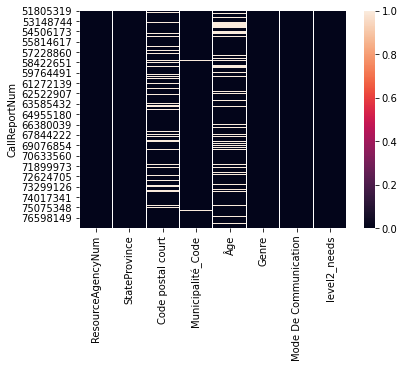

In [53]:
import seaborn as sns
sns.heatmap(feature_prep.isna())

In [54]:
features = feature_prep.dropna()

In [55]:
features['ResourceAgencyNum'] = features['ResourceAgencyNum'].apply(lambda x : [int(d) for d in x if not np.isnan(d)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
features['Municipalité_Code'] = features['Municipalité_Code'].astype(int)
features['Âge'] = features['Âge'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
features

,ResourceAgencyNum,StateProvince,Code postal court,Municipalité_Code,Âge,Genre,Mode De Communication,level2_needs
CallReportNum,,,,,,,,
51805954,"[18760351, 18762550]",QC,H1T,66213,35,Homme,Appels,[BD]
51806377,"[18763063, 18761510, 18765819, 18765819]",QC,H1J,66201,40,Homme,Appels,"[BD, BD]"
51807633,"[18762080, 18763449, 18765728]",QC,H4N,66214,50,Homme,Appels,"[PS, TC, PL]"
51821680,"[18767637, 18767637, 18767637, 18766010, 18765...",QC,H2X,66205,30,Homme,Appels,"[BH, BH, BH]"
51821761,"[34458497, 34766952, 34025281]",QC,H7N,65105,88,Femme,Appels,[DT]
...,...,...,...,...,...,...,...,...
78141954,"[18761799, 18760242, 18761005]",QC,J4J,58227,30,Homme,Appels,[BH]
78142716,"[18760559, 18760047, 18765786]",QC,H1N,66208,72,Femme,Appels,"[BD, BD, BD]"
78144190,[18764548],QC,J3L,57005,2,Femme,Appels,[TJ]


In [58]:
from sklearn.preprocessing import MultiLabelBinarizer
y = MultiLabelBinarizer().fit_transform(features.iloc[:,0])

In [59]:
print(y.shape)
y

(65245, 4396)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [61]:
categorical_features = features[['StateProvince','Code postal court','Municipalité_Code', 'Genre',	'Mode De Communication']]

In [62]:
enc.fit(categorical_features)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [63]:
enc.categories_

[array(['BC', 'ON', 'QC'], dtype=object),
 array(['G0A', 'G0C', 'G0L', 'G0M', 'G0R', 'G0S', 'G0V', 'G1C', 'G1E',
        'G1H', 'G1J', 'G1K', 'G1L', 'G1M', 'G1N', 'G1P', 'G1R', 'G1S',
        'G1T', 'G1V', 'G1W', 'G1X', 'G1Y', 'G2A', 'G2B', 'G2G', 'G2J',
        'G2K', 'G2M', 'G3B', 'G3J', 'G3M', 'G3N', 'G4V', 'G4Z', 'G5A',
        'G5L', 'G5R', 'G5V', 'G5Y', 'G6E', 'G6G', 'G6H', 'G6P', 'G6T',
        'G6V', 'G7S', 'G7X', 'G8L', 'G8Y', 'G9A', 'G9H', 'G9N', 'G9P',
        'H1A', 'H1B', 'H1C', 'H1E', 'H1G', 'H1H', 'H1J', 'H1K', 'H1L',
        'H1M', 'H1N', 'H1P', 'H1R', 'H1S', 'H1T', 'H1V', 'H1W', 'H1X',
        'H1Y', 'H1Z', 'H2A', 'H2B', 'H2C', 'H2E', 'H2G', 'H2H', 'H2J',
        'H2K', 'H2L', 'H2M', 'H2N', 'H2P', 'H2R', 'H2S', 'H2T', 'H2V',
        'H2W', 'H2X', 'H2Y', 'H2Z', 'H3A', 'H3B', 'H3C', 'H3E', 'H3G',
        'H3H', 'H3J', 'H3K', 'H3L', 'H3M', 'H3N', 'H3P', 'H3R', 'H3S',
        'H3T', 'H3V', 'H3W', 'H3X', 'H3Y', 'H3Z', 'H4A', 'H4B', 'H4C',
        'H4E', 'H4G', 'H4H', 'H4J',

In [64]:
X = enc.transform(categorical_features)

In [65]:
from scipy.sparse import hstack

In [ ]:
# features['Âge'].values

array([35, 40, 50, ...,  2, 85,  4])

In [ ]:
# hstack(X, features['Âge'].values)

ValueError: ignored

# Model Training


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
kc = KNeighborsClassifier()


In [69]:
kc.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kc_predictions = kc.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, kc_predictions)
print(f'Mean Absolute Error: {mae} Calls')

In [ ]:
from sklearn.metrics import     

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(y_test, gb_predictions)
plt.xlabel("True")
plt.ylabel("Predicted")